In [1]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [51]:
# read csv into dataframe

injury_data_df = pd.read_csv("injury_data_updated.csv")
injury_data_df.head()

,Unnamed: 0,Season Year,Week,Team Name,Team City,Player,Player Jersey,Position,Injury Status,Injury Status Date,Practice Status,Injury Type
0,0,2023.0,1.0,Cowboys,Dallas,Jourdan Lewis,2.0,CB,NaN,2023-09-08T00:00:00+00:00,Full Participation In Practice,Foot
1,1,2023.0,1.0,Cowboys,Dallas,Tyler Smith,73.0,OL,Doubtful,2023-09-08T00:00:00+00:00,Did Not Participate In Practice,Hamstring
2,2,2023.0,1.0,Cowboys,Dallas,Sam Williams,54.0,DE,Questionable,2023-09-08T00:00:00+00:00,Full Participation In Practice,Foot
3,3,2023.0,1.0,Cowboys,Dallas,Donovan Wilson,6.0,SAF,Doubtful,2023-09-08T00:00:00+00:00,Did Not Participate In Practice,Calf
4,4,2023.0,1.0,Cowboys,Dallas,Malik Hooker,28.0,SAF,Questionable,2023-09-09T00:00:00+00:00,Did Not Participate In Practice,Illness


In [5]:
# get total unique injury count

injury_data_df['Injury Type'].nunique()

60

In [7]:
# see what 60 injuries are in the dataset

injury_data_df['Injury Type'].unique()

array(['Foot', 'Hamstring', 'Calf', 'Illness', 'Ankle', 'Chest',
       'Abdomen', 'NIR - Personal', 'Knee', 'Back', 'Quad', 'NIR - Rest',
       'Oblique', 'Shoulder', 'Elbow', 'Ribs', 'Groin', 'Heel', 'Wrist',
       'Toe', 'NIR-Rest', 'Hamsting', 'Neck', 'Forearm', 'Concussion',
       'Hand', 'Rest', 'Thigh', 'Shin', 'Hip', 'Personal', 'Pectoral',
       'NIR  -  Rest', 'Finger', 'Biceps', 'Thumb', 'Achilles', 'Eye',
       'Quadriceps', 'Quadricep', 'Bicep', 'Rib', 'Vet Rest', 'Face',
       'NIR', 'Other', 'Triceps', 'triceps', 'Achillies', 'Ankle/Foot',
       'ribs', 'Right Shoulder', 'Head', 'Glute', 'Ankle/Elbow',
       'Personal matter', 'Tooth', 'Not Injury Related', 'Tibia', 'Rest '],
      dtype=object)

In [9]:
# clean up data set removing non-injuries

injury_updated_df = injury_data_df.drop(injury_data_df[injury_data_df['Injury Type'].isin([
    'Illness',
    'NIR - Personal',
    'NIR - Rest',
    'NIR-Rest',
    'Rest',
    'Personal',
    'NIR  -  Rest',
    'Vet Rest',
    'NIR',
    'Personal matter',
    'Not Injury Related',
    'Rest '])].index)
injury_updated_df.head()

,Unnamed: 0,Season Year,Week,Team Name,Team City,Player,Player Jersey,Position,Injury Status,Injury Status Date,Practice Status,Injury Type
0,0,2023.0,1.0,Cowboys,Dallas,Jourdan Lewis,2.0,CB,NaN,2023-09-08T00:00:00+00:00,Full Participation In Practice,Foot
1,1,2023.0,1.0,Cowboys,Dallas,Tyler Smith,73.0,OL,Doubtful,2023-09-08T00:00:00+00:00,Did Not Participate In Practice,Hamstring
2,2,2023.0,1.0,Cowboys,Dallas,Sam Williams,54.0,DE,Questionable,2023-09-08T00:00:00+00:00,Full Participation In Practice,Foot
3,3,2023.0,1.0,Cowboys,Dallas,Donovan Wilson,6.0,SAF,Doubtful,2023-09-08T00:00:00+00:00,Did Not Participate In Practice,Calf
5,5,2023.0,1.0,Cowboys,Dallas,Tyron Smith,77.0,T,Questionable,2023-09-08T00:00:00+00:00,Limited Participation In Practice,Ankle


In [11]:
# see updated count of injury types

injury_updated_df['Injury Type'].nunique()

48

In [13]:
# view in full to double check entries

injury_updated_df['Injury Type'].unique()

array(['Foot', 'Hamstring', 'Calf', 'Ankle', 'Chest', 'Abdomen', 'Knee',
       'Back', 'Quad', 'Oblique', 'Shoulder', 'Elbow', 'Ribs', 'Groin',
       'Heel', 'Wrist', 'Toe', 'Hamsting', 'Neck', 'Forearm',
       'Concussion', 'Hand', 'Thigh', 'Shin', 'Hip', 'Pectoral', 'Finger',
       'Biceps', 'Thumb', 'Achilles', 'Eye', 'Quadriceps', 'Quadricep',
       'Bicep', 'Rib', 'Face', 'Other', 'Triceps', 'triceps', 'Achillies',
       'Ankle/Foot', 'ribs', 'Right Shoulder', 'Head', 'Glute',
       'Ankle/Elbow', 'Tooth', 'Tibia'], dtype=object)

In [15]:
# generate count by injury type

injury_updated_df['Injury Type'].value_counts().head()

Injury Type
Knee          516
Ankle         423
Hamstring     366
Shoulder      234
Concussion    162
Name: count, dtype: int64

In [17]:
# clean data frame by fixing typos

injury_updated_df['Injury Type'] = injury_updated_df['Injury Type'].replace({
    'ribs': 'Rib',
    'Ribs': 'Rib',
    'Biceps': 'Bicep',
    'Quadricep': 'Quad',
    'Quadriceps': 'Quad',
    'Hamsting': 'Hamstring',
    'Achillies': 'Achilles',
    'Right Shoulder': 'Shoulder',
    'Triceps': 'Tricep',
    'triceps': 'Tricep',
    
})
injury_updated_df['Injury Type'].value_counts().head()

Injury Type
Knee          516
Ankle         423
Hamstring     367
Shoulder      235
Concussion    162
Name: count, dtype: int64

In [19]:
# get count updates 

injury_updated_df['Injury Type'].nunique()

39

In [21]:
# use groupby to get injury counts by injury type but ensuring no duplicate entries are counted

injury_counts_by_position = injury_updated_df.groupby(['Position', 'Injury Type'])['Player'].nunique()
injury_counts_by_position = injury_counts_by_position.reset_index(name='Count')

injury_counts_by_position.head()

,Position,Injury Type,Count
0,C,Ankle,3
1,C,Ankle/Foot,1
2,C,Back,1
3,C,Chest,1
4,C,Concussion,1


In [23]:
# get a dataframe to pull specifically concussions by position

concussion_risk_by_positions = injury_counts_by_position[injury_counts_by_position['Injury Type'] == 'Concussion']
concussion_risk_by_positions.head()

,Position,Injury Type,Count
4,C,Concussion,1
19,CB,Concussion,13
41,DB,Concussion,4
55,DE,Concussion,3
99,DT,Concussion,1


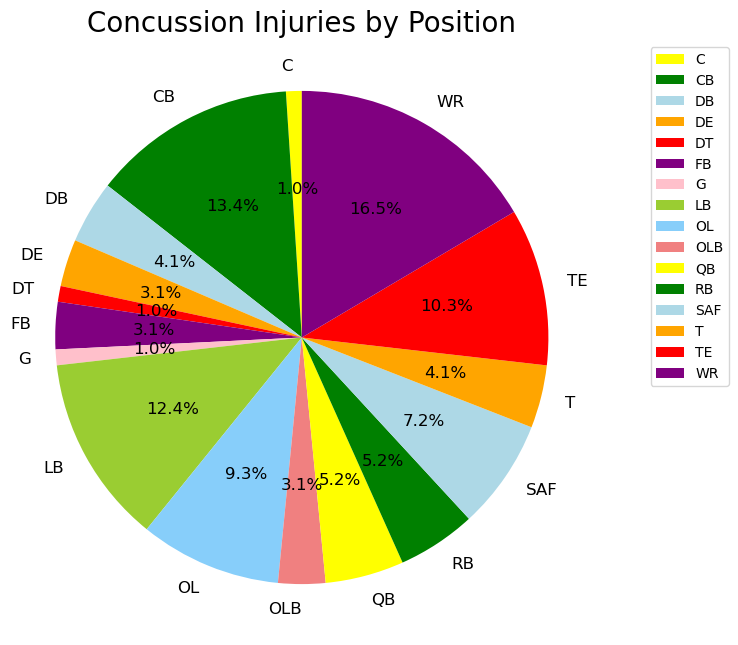

In [25]:
# plot data with a piechart to best show distribution

positions = concussion_risk_by_positions.groupby('Position')['Count'].sum().index
counts = concussion_risk_by_positions.groupby('Position')['Count'].sum().values

colors = [
    "yellow",
    "green",
    "lightblue",
    "orange",
    "red",
    "purple",
    "pink",
    "yellowgreen",
    "lightskyblue",
    "lightcoral"]

plt.figure(figsize=(7, 5))
plt.pie(counts, colors=colors, labels=positions, autopct="%1.1f%%", startangle=90, textprops={'fontsize': 12})
plt.axis('equal')
plt.title("Concussion Injuries by Position", fontsize=20)
plt.legend(positions, loc='upper right', bbox_to_anchor=(1.3, 1))
plt.subplots_adjust(top=1.3)  
plt.show()

In [31]:
# Identify top 5 positions with highest concussion counts

top_5_positions = concussion_risk_by_positions.groupby('Position')['Count'].sum().nlargest(5)
top_5_positions

Position
WR    16
CB    13
LB    12
TE    10
OL     9
Name: Count, dtype: int64

In [47]:
# converting to dataframe for better visual

top_5_positions = concussion_risk_by_positions.groupby('Position')['Count'].sum().nlargest(5).reset_index(name='Count')
top_5_positions

,Position,Count
0,WR,16
1,CB,13
2,LB,12
3,TE,10
4,OL,9
